In [2]:
pip install apyori

Note: you may need to restart the kernel to use updated packages.


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df=pd.read_csv("Groceries_dataset.csv")

In [5]:
df.shape

(38765, 3)

In [6]:
df.describe()

,Member_number
count,38765.000000
mean,3003.641868
std,1153.611031
min,1000.000000
25%,2002.000000
50%,3005.000000
75%,4007.000000
max,5000.000000


In [7]:
df.notnull().sum()

Member_number      38765
Date               38765
itemDescription    38765
dtype: int64

In [8]:
df.head()

,Member_number,Date,itemDescription
0,1808,21-07-2015,tropical fruit
1,2552,05-01-2015,whole milk
2,2300,19-09-2015,pip fruit
3,1187,12-12-2015,other vegetables
4,3037,01-02-2015,whole milk


In [9]:
#setting index as date
df.set_index('Date',inplace=True)

In [10]:
df.index=pd.to_datetime(df.index)

/tmp/ipykernel_36930/1954437206.py:1: UserWarning: Parsing dates in %d-%m-%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df.index=pd.to_datetime(df.index)


In [11]:
df.head()

,Member_number,itemDescription
Date,,
2015-07-21,1808,tropical fruit
2015-01-05,2552,whole milk
2015-09-19,2300,pip fruit
2015-12-12,1187,other vegetables
2015-02-01,3037,whole milk


In [12]:
total_item=len(df)
total_days=len(np.unique(df.index.date))
total_months=len(np.unique(df.index.year))
print(total_item,total_days,total_months)

38765 728 2


/tmp/ipykernel_36930/316386195.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=df.itemDescription.value_counts().head(20).index,y=df.itemDescription.value_counts().head(20).values,palette='gnuplot')


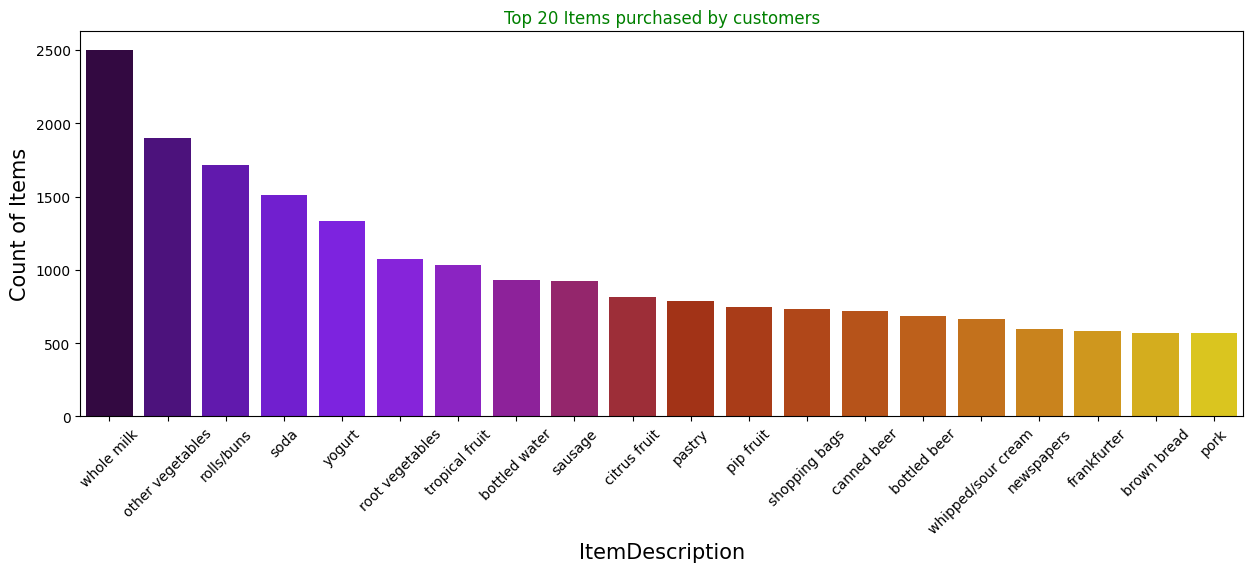

In [13]:
plt.figure(figsize=(15,5))
sns.barplot(x=df.itemDescription.value_counts().head(20).index,y=df.itemDescription.value_counts().head(20).values,palette='gnuplot')
plt.xlabel('ItemDescription',size=15)
plt.xticks(rotation=45)
plt.ylabel('Count of Items',size=15)
plt.title('Top 20 Items purchased by customers',color='green')
plt.show()

In [14]:
df['itemDescription'].value_counts()

itemDescription
whole milk               2502
other vegetables         1898
rolls/buns               1716
soda                     1514
yogurt                   1334
                         ... 
rubbing alcohol             5
bags                        4
baby cosmetics              3
kitchen utensil             1
preservation products       1
Name: count, Length: 167, dtype: int64

In [15]:
df=df.groupby(['Member_number','Date'])['itemDescription'].apply(lambda x: list(x))

In [16]:
df.head()
transactions=df.values.tolist()
transactions[:10]

[['whole milk', 'pastry', 'salty snack'],
 ['sausage', 'whole milk', 'semi-finished bread', 'yogurt'],
 ['soda', 'pickled vegetables'],
 ['canned beer', 'misc. beverages'],
 ['sausage', 'hygiene articles'],
 ['sausage', 'whole milk', 'rolls/buns'],
 ['whole milk', 'soda'],
 ['frankfurter', 'soda', 'whipped/sour cream'],
 ['beef', 'white bread'],
 ['frankfurter', 'curd']]

In [17]:
from apyori import apriori

In [18]:
rules=apriori(transactions,min_support=0.00030,min_confidence=0.05,min_lift=2,min_length=2)
results=list(rules)
results

[RelationRecord(items=frozenset({'soda', 'artif. sweetener'}), support=0.00046782062420637575, ordered_statistics=[OrderedStatistic(items_base=frozenset({'artif. sweetener'}), items_add=frozenset({'soda'}), confidence=0.2413793103448276, lift=2.4857251346797353)]),
 RelationRecord(items=frozenset({'berries', 'condensed milk'}), support=0.0003341575887188398, ordered_statistics=[OrderedStatistic(items_base=frozenset({'condensed milk'}), items_add=frozenset({'berries'}), confidence=0.05102040816326531, lift=2.34177413296607)]),
 RelationRecord(items=frozenset({'brandy', 'whole milk'}), support=0.0008688097306689834, ordered_statistics=[OrderedStatistic(items_base=frozenset({'brandy'}), items_add=frozenset({'whole milk'}), confidence=0.34210526315789475, lift=2.1662805978127717)]),
 RelationRecord(items=frozenset({'butter', 'sweet spreads'}), support=0.0003341575887188398, ordered_statistics=[OrderedStatistic(items_base=frozenset({'sweet spreads'}), items_add=frozenset({'butter'}), confid

In [23]:
def inspect(results):
    lhs=[tuple(result[2][0][0])[0] for result in results]
    rhs=[tuple(result[2][0][1])[0] for result in results]
    supports=[result[1] for result in results]
    confidence=[result[2][0][2] for result in results]
    lifts=[result[2][0][3] for result in results]
    return list(zip(lhs,rhs,supports,confidence,lifts))
ordered_results=pd.DataFrame(inspect(results),columns=['Left Hand Side','Right Hand Side','Support','Confidence','Lift'])
ordered_results

,Left Hand Side,Right Hand Side,Support,Confidence,Lift
0,artif. sweetener,soda,0.000468,0.241379,2.485725
1,condensed milk,berries,0.000334,0.051020,2.341774
2,brandy,whole milk,0.000869,0.342105,2.166281
3,sweet spreads,butter,0.000334,0.073529,2.087705
4,liver loaf,canned beer,0.000401,0.120000,2.557778
...,...,...,...,...,...
99,rolls/buns,yogurt,0.000601,0.204545,2.381800
100,shopping bags,yogurt,0.000401,0.206897,2.409178
101,yogurt,sausage,0.001470,0.131737,2.182917
102,other vegetables,soda,0.000334,0.090909,7.817659
